<a href="https://colab.research.google.com/github/MonkeyDMemo/ML_churn/blob/main/Examen_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar librerías
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
#URL de la base de datos, se puso en github para que no dependiera del archivo en drive y que se pueda correr el archivo en cualquier computadora
url = 'https://raw.githubusercontent.com/Cristian-Fontes/BreastCancerWisconsin/main/data.csv'

In [ ]:
#Leer el archivo csv
df = pd.read_csv(url,index_col=0,sep=',')

In [ ]:
#Revisamos cómo se ven las primeros 5 observaciones
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Revisamos si hay nulos y tipos de variables que tenemos
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [ ]:
#Eliminamos columna que se genera por error en el archivo CSV 
df.dropna(axis=1,inplace=True)

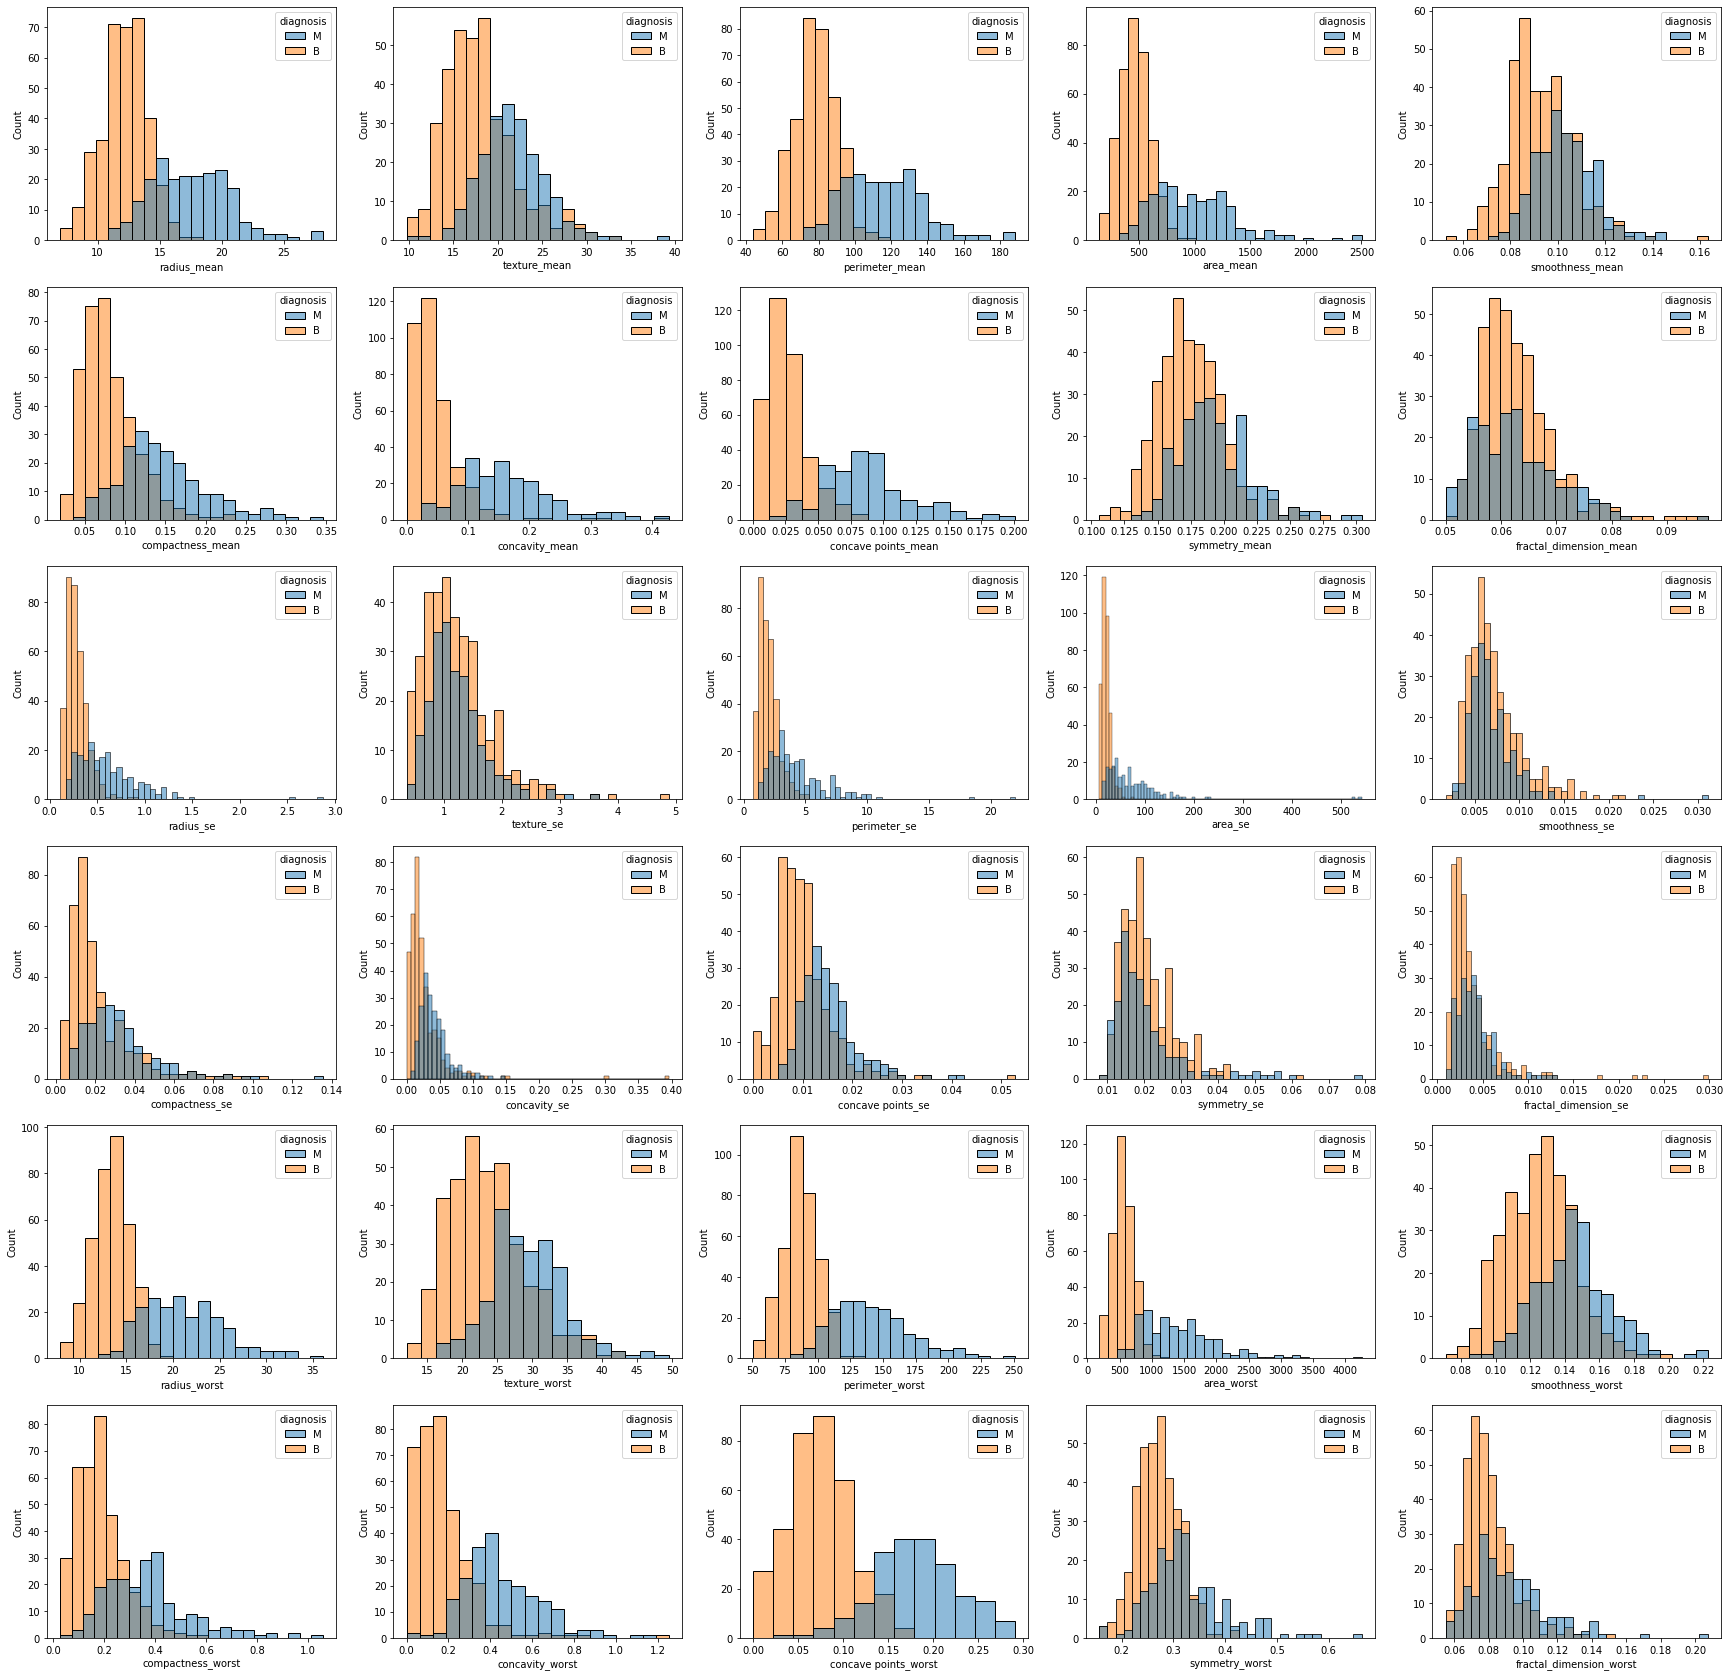

In [ ]:
#Generamos histogramas de las variables para ver cómo se separa un grupo de otro (Maligno y Beningo) 
fig, axs = plt.subplots(6, 5, figsize=(30, 30))
x=0
y=0
for i in df.drop(columns='diagnosis').columns:
  sns.histplot(df,x=i,hue='diagnosis',ax=axs[y,x]);
  if x==4:
    y=y+1
    x=0
  else:
    x=x+1



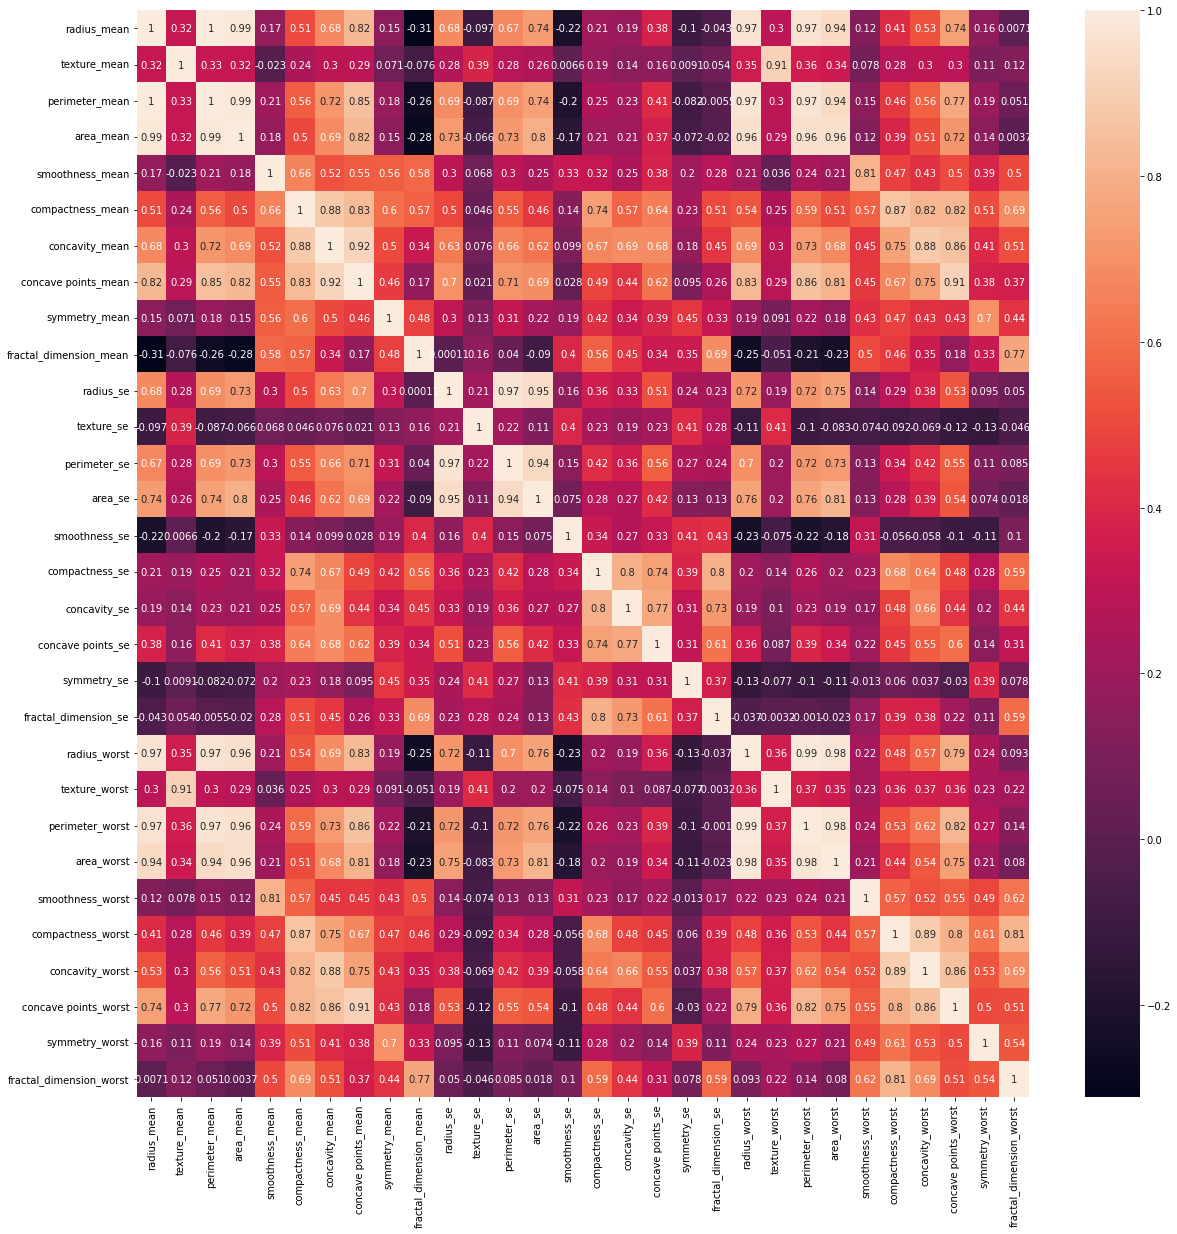

In [ ]:
#Matriz de correlación para ver cómo se relacionan las diferentes características
correlation = df.drop(columns='diagnosis').corr()
#Graficar en un mapa de calor
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, annot=True, ax=ax);

In [ ]:
#Hacer columna objetivo binaria
replacers = {'M':1,'B':0}
df['diagnosis'] = df['diagnosis'].replace(replacers)

In [ ]:
#Proporción de benignos y malignos
df['diagnosis'].value_counts()/df['diagnosis'].shape[0]

0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [ ]:
#Separar el dataset entre el target y las características
target = 'diagnosis'
X = df.drop(columns=target)
y = df[target]

In [ ]:
#Debido a los análisis anteriores, se tienen muchas características interrelacionadas y se hará un árbol de decisión para encontrar las características principales
model = DecisionTreeClassifier(criterion='entropy',max_depth=None, random_state=42)

In [ ]:
#Entrenamos el modelo
model.fit(X,y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#Tomamos las características
features = X.columns
importances = model.feature_importances_

In [ ]:
#Pasamos las características a una variable
feat_imp = pd.Series(data=importances,index=features).sort_values()

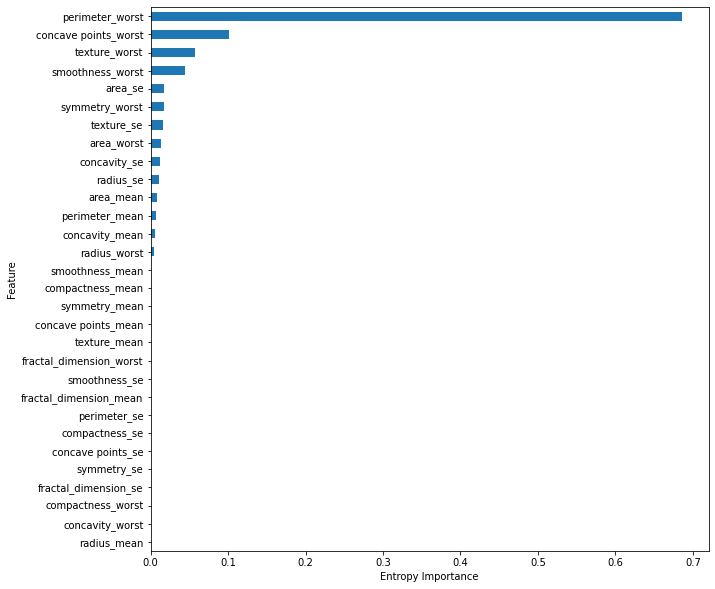

In [ ]:
#Graficamos las características por importancia
fig, ax = plt.subplots(figsize=(10,10))
feat_imp.plot(kind="barh", ax=ax)
plt.xlabel("Entropy Importance")
plt.ylabel("Feature");

In [ ]:
#Seleccionamos las características que tengan importancia superior a 0
feat_selection = feat_imp[feat_imp>0]

In [ ]:
#Revisamos qué características son
feat_selection.index

Index(['radius_worst', 'concavity_mean', 'perimeter_mean', 'area_mean',
       'radius_se', 'concavity_se', 'area_worst', 'texture_se',
       'symmetry_worst', 'area_se', 'smoothness_worst', 'texture_worst',
       'concave points_worst', 'perimeter_worst'],
      dtype='object')

In [ ]:
#Volvemos a armar las características y el target
X2 = df[feat_selection.index]
Y2 = df[target]

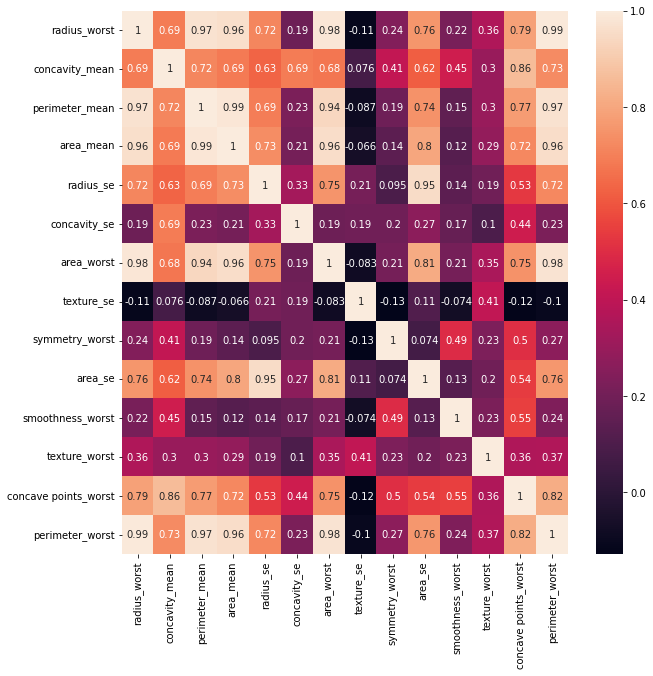

In [ ]:
#Matriz de correlación
correlation = X2.corr()
#Graficamos el mapa de calor para ver correlaciones de forma gráfica
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True, ax=ax);

In [ ]:
#Seleccionamos características con correlación alta y nos quedamos con solo una
columnas_alta_correlacion = ['perimeter_worst','area_se','area_worst','area_mean','perimeter_mean']

In [ ]:
#Eliminamos características con alta correlación
X2.drop(columns=columnas_alta_correlacion,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
X2.shape

(569, 9)

In [ ]:
#75 % entrenamiento y 25 % prueba
X_train,X_test,Y_train,Y_test = train_test_split(X2,Y2,test_size=0.25,random_state=42)

In [ ]:
#Estandarizacion de variables
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#construimos nuestro clasificador logistico
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#entrenamos nuestro modelo
predictions= classifier.predict(X_test)

In [ ]:
#Evaluamos nuestro modelo
cm= confusion_matrix(Y_test,predictions)

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test,predictions).ravel()

In [ ]:
(tn,fp,fn,tp)

(89, 0, 3, 51)

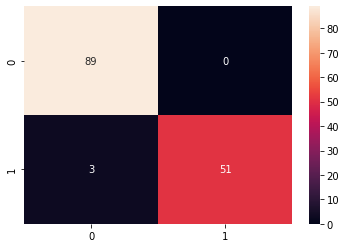

In [ ]:
sns.heatmap(cm,annot=True)

In [ ]:
print(accuracy_score(Y_test,predictions))

0.9790209790209791


In [ ]:
#Sacamos la probabilidad para ver claramente en donde está tomando la decisión
resultados = {'P(B)' : classifier.predict_proba(X_test)[:,0],
              'P(M)' : classifier.predict_proba(X_test)[:,1], 
              'y_pred_50' : classifier.predict(X_test),          
              }

In [ ]:
#Ordenamos el dataframe para localizar en donde cambia de benigno a maligno
predicciones = pd.DataFrame(resultados)
predicciones.sort_values('P(B)',
                         ascending=False).iloc[80:100]

,P(B),P(M),y_pred_50
124,0.934968,0.065032,0
39,0.928107,0.071893,0
20,0.901578,0.098422,0
0,0.866851,0.133149,0
52,0.844061,0.155939,0
91,0.837403,0.162597,0
112,0.740240,0.259760,0
138,0.719992,0.280008,0
82,0.693289,0.306711,0
8,0.672068,0.327932,0


In [ ]:
#Cambiamos la probabilidad del 50% por default al 30% 
predicciones['y_pred_30'] = np.where( predicciones['P(M)'] > .30, 1, 0)
predicciones.sort_values('P(B)',
                         ascending=False).iloc[80:100]

,P(B),P(M),y_pred_50,y_pred_30
124,0.934968,0.065032,0,0
39,0.928107,0.071893,0,0
20,0.901578,0.098422,0,0
0,0.866851,0.133149,0,0
52,0.844061,0.155939,0,0
91,0.837403,0.162597,0,0
112,0.740240,0.259760,0,0
138,0.719992,0.280008,0,0
82,0.693289,0.306711,0,1
8,0.672068,0.327932,0,1


In [ ]:
confusion_matrix_p30 = confusion_matrix(Y_test,predicciones['y_pred_30'])

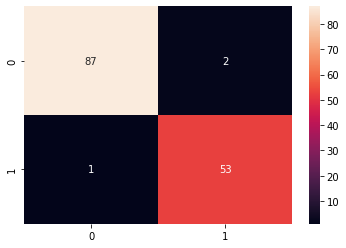

In [ ]:
#Observamos cómo se mueven los falsos negativos que son los que preocupan
sns.heatmap(confusion_matrix_p30,annot=True)

In [ ]:
#Mostramos la precisión del modelo
print(accuracy_score(Y_test,predicciones['y_pred_30']))

0.9790209790209791
